## Lista de Exercício 05 e 06 - Fundamentos de Matemática para Computação.

# Universidade Federal do ABC - UFABC
## Centro de Matemática, Computação e Cognição - CMCC

## Disciplina:  Fundamentos de Matemática para a Computação -  CCM-007

Responsável: Prof. Dr. Saul Leite

Estudantes: Bruno Aristimunha.

Santo André, 17 de Março de 2019

### Primeira Parte do Curso

#### Objetivos

O objetivo dessa lista é explorar e aplicar os conceitos de sala de aula sobre **Raízes para Equações Não-Lineares**.

Para alcançar esse objetivo a resolução dos exercícios é necessária.




In [0]:
import matplotlib.pylab as plt

import sympy as sp
import mpmath as mp
import math 
import pandas as pd
import numpy as np

plt.style.use("ggplot")


---
## E1: Seja $f (x) = \frac{x^{2}}{2} + x(\log(x) − 1)$. Obtenha seus pontos extremos com o auxílio do método da Bisseção.

---

Dado a falta de informações sobre os limites laterais da $f(x)$ realizamos um plotagem inicial para verificar o seu comportamento no intervalo $[.25,2]$. Além disso, interpretamos "pontos extremos" como o minímo ou máximo global da função.

Para tanto, podemos encontrar $f'(x)=0$ e com o valor de $x$ aplicar na função original. Dessa forma:



In [0]:
x = sp.var('x')
sp.diff((x**2)/2) + x*(sp.log(x)-1)

x*(log(x) - 1) + x

In [0]:
funcao = lambda x: x*(math.log(x) - 1) + x

Observando o gráfico, escolhemos os pontos $[0.001, 1]$ para os limites laterais inicias.

In [0]:
def bisect(intervalo, funcao, erro):
  valores = np.array([])#pd.DataFrame([],columns=['k','a','b','x','f(a)','f(b)','f(x)','(b-a)/2'])
  k = 0
  a = intervalo[0]
  b = intervalo[1]
  xk = (a+b)/2
  
  print("Intervalo: [{:.2f},{:.2f}]".format(a, b), "| Iteração:", k+1, "|(b-a) = {:.2f}".format((b-a)/2),"|Valor de x:{:.2f}".format(xk),"|Valor na F(xk):{:.2f}".format(funcao(xk)))

  while(np.abs(b-a) >= 2*erro):
     
    xk = (a+b)/2
    #print(funcao(a),funcao(xk), funcao(a)*funcao(xk))
    if(funcao(a)*funcao(xk) < 0):
      a = a
      b = xk
    
    else:
    
      a = xk
      b = b
      
    k=k+1
    print("Intervalo: [{:.2f},{:.2f}]".format(a, b), "| Iteração:", k+1, "|(b-a) = {:.2f}".format((b-a)/2),"|Valor de x:{:.2f}".format(xk),"|Valor na F(xk):{:.2f}".format(funcao(xk)))
   
 
    #print(valor)
    #valores = np.append(valores, valor)
    #valores = np.append(valores,[k,a,b,xk,f_x(a),f_x(b), f_x(xk),(b-a)/2],axis=0)
  return xk

In [0]:
valor = bisect(intervalo = [0.001,2],funcao = f_x_1, erro = 0.3)

Intervalo: [0.00,2.00] | Iteração: 1 |(b-a) = 1.00 |Valor de x:1.00 |Valor na F(xk):0.00
Intervalo: [0.00,1.00] | Iteração: 2 |(b-a) = 0.50 |Valor de x:1.00 |Valor na F(xk):0.00
Intervalo: [0.50,1.00] | Iteração: 3 |(b-a) = 0.25 |Valor de x:0.50 |Valor na F(xk):-0.35


In [0]:
valor

0.5007499999999999

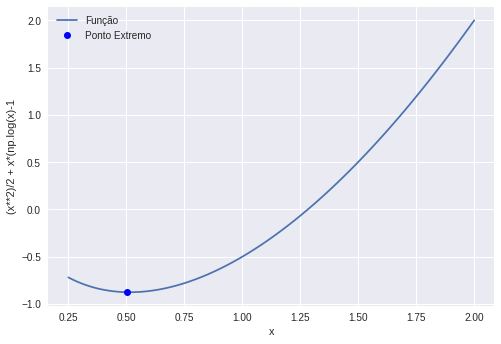

In [0]:
pontos = np.linspace(0.25,2,100)
f_x = lambda x: ((x**2)/2) + x*(math.log2(x)-1)
#f_2 = lambda g: g**2 -2
plt.plot(pontos,list(map(f_x,pontos)), label="Função")
plt.plot(valor,f_x(valor), 'bo' , label="Ponto Extremo")

plt.xlabel("x")
plt.ylabel("(x**2)/2 + x*(np.log(x)-1")
plt.legend(loc='best')
plt.show()

Para analisar a nossa implementação, bem como, a escolha do intervalo, empregamos o método com alta precisão implementado pela biblioteca mp.math.

In [0]:
valor - mp.findroot(f_x_1,x0=(0.1,2), solver='bisect')

mpf('-0.49924999999999992')

Concluímos que a implementação apresenta o resultado dentro da precisão solicitada.

---
## E2: Sabe-se que $f (x) = \cos(x) − x^{2}$ possui um  zero no intervalo $[0, 1]$.  Mostre que o método do ponto fixo com função de iteração $\varphi(x) = \sqrt{\cos(x)}$ converge para a raiz contida no intervalo $[0, 1]$.

---

$> \varphi(x) = \sqrt{\cos(x)}$

 
 
 


In [0]:
import numpy as np

In [0]:
def pontoFixo_02(x0, erro):
  i = 0
  xk = x0  
  
  x_k_1 = phi_x(x0)

  eps = np.fabs(xk-x_k_1)
  
  #print(eps)
  
  #print("x1 =  %.5f, eps =~ %.1e" % (x0, eps))  

  while(eps>=erro):
      i = i+1
      xk= x_k_1
      
      x_k_1 = phi_x(x_k_1)
      
      eps = np.fabs(x_k_1-xk)
      #print(eps)
      print("%s =~ %.8f, eps =~ %.1e" % (('x'+str(i)), xk, eps))  
  return (x_k_1)

In [0]:
phi_x = lambda k: np.sqrt(np.cos(k))  
#
pontoFixo_02(.5,.01)

x1 =~ 0.93679377, eps =~ 1.7e-01
x2 =~ 0.76965850, eps =~ 7.8e-02
x3 =~ 0.84743634, eps =~ 3.4e-02
x4 =~ 0.81357667, eps =~ 1.5e-02
x5 =~ 0.82879641, eps =~ 6.7e-03


0.8220483178672121

---
## E3: O valor de $\pi$ pode ser obtido através da resolução das seguintes equações: 
 ---

 Aplique o método de Newton com $x_0 = 3$ e com precisão $10^{−7}$ em cada caso e compare os resultados obtidos.
 Justifique.
 

 > (a) $sin(x) = 0$
 
 > (b) $cos(x) + 1 = 0$ 

Seja a função de iteração dado por:

> $\varphi_a(x) =  x - \frac{f(x)}{f'(x)} =  x - \frac{\sin(x)}{\cos(x)}$

> $\varphi_b(x) =  x - \frac{f(x)}{f'(x)} =  x + \frac{\cos(x) + 1}{\sin(x)}$

In [0]:
import scipy as sci
import numpy as np

In [0]:
#funcao do pto. fixo  
def letra_a(x):  
    return x - np.sin(x)/np.cos(x)  
def letra_b(x):  
    return x + (np.cos(x)+1)/(np.sin(x))  
    
  
def pontoFixo(x0, f, erro):
   
  xe = sci.optimize.fixed_point(f, x0)  

  
  eps = np.fabs(x0-xe)  
  print("x1 =  %.5f, eps =~ %.1e" % (x0, eps))  
  i = 0
  while(eps>=erro):
      
      x = f(x0);  
      eps = np.fabs(x-xe);  
      print("%s =~ %.8f, eps =~ %.1e" % (('x'+str(i+2)), x, eps))  
      x0 = x
      i = i+1

In [0]:
pontoFixo(3,letra_a,1e-7)

x1 =  3.00000, eps =~ 1.4e-01
x2 =~ 3.14254654, eps =~ 9.5e-04
x3 =~ 3.14159265, eps =~ 2.9e-10


In [0]:
pontoFixo(3,letra_b,1e-7)

x1 =  3.00000, eps =~ 1.4e-01
x2 =~ 3.07091484, eps =~ 7.1e-02
x3 =~ 3.10626847, eps =~ 3.5e-02
x4 =~ 3.12393240, eps =~ 1.8e-02
x5 =~ 3.13276275, eps =~ 8.8e-03
x6 =~ 3.13717773, eps =~ 4.4e-03
x7 =~ 3.13938520, eps =~ 2.2e-03
x8 =~ 3.14048893, eps =~ 1.1e-03
x9 =~ 3.14104079, eps =~ 5.5e-04
x10 =~ 3.14131672, eps =~ 2.8e-04
x11 =~ 3.14145469, eps =~ 1.4e-04
x12 =~ 3.14152367, eps =~ 6.9e-05
x13 =~ 3.14155816, eps =~ 3.4e-05
x14 =~ 3.14157541, eps =~ 1.7e-05
x15 =~ 3.14158403, eps =~ 8.6e-06
x16 =~ 3.14158834, eps =~ 4.3e-06
x17 =~ 3.14159050, eps =~ 2.2e-06
x18 =~ 3.14159158, eps =~ 1.1e-06
x19 =~ 3.14159211, eps =~ 5.4e-07
x20 =~ 3.14159238, eps =~ 2.7e-07
x21 =~ 3.14159252, eps =~ 1.3e-07
x22 =~ 3.14159259, eps =~ 6.7e-08


Houve uma diferença entre número de iterações necessárias para encontrar o valor de $\pi$. Isso ocorre pois a nossa $f_b(x)$ possui uma multiplicidade $m$ diferente. Ou seja:


$\begin{align}
f(x)=& +\cos(x) + 1& x &=2\pi &\implies& cos(2\pi)+1 = 0 \\
f'(x)=& - \sin(x) & x &=0 &\implies& - sin(0) = 0\\
f''(x)=& -\cos(x) & x &= \pi/2 &\implies& -cos(\pi/2) = 0\\
f'''(x)=&+\sin(x)& x &=0 &\implies& + sin(0) = 0\\
\end{align}$

A função apresenta três raizes. Conforme visto em sala, isso acarreta na redução da velocidade do método.



---
## E4: Suponha que você deseja calcular b/a em um computador capaz de somente somar, subtrair e multiplicar. Responda: 
---

> (a) Use o método de Newton para estabelecer uma forma de calcular $\frac{1}{a}$ (dica: note que $\frac{1}{a}$ é o zero de $f (x) = \frac{1}{x-a}$).

> (b) Mostre que o método de Newton converge quando o ponto inicial $x_0$ está no intervalo $[\frac{1}{2a}, \frac{3}{2a}]$.
 
 > (c) Implemente o método do item (a) em Python e calcule $\frac{10}{9}$.
 

---
## E5: Suponha que você deseja computar $\sqrt{b}$ em um computador que não possui a função de “raiz quadrada”. Responda: 

---
>(a) Use  o método de Newton para estabelecer uma forma de calcular a raiz (dica: note que $\sqrt{b}$ é zero da função $f (x) = x^2 − b$).


Através do método de Newton podemos resolver equações $f(x) = 0$ e nos aproximar desse valor de $x$. Basicamente nós realizamos aproximações tal qual geramos um $x_k$, em que $k$ corresponde a interação que responde a seguinte equação:

$\begin{align}
y  &=f(x_k) + f'(x_k)(x-x_k),\\
\text{Note que} &\text{ na próxima iteração realizamos uma tangente (derivamos):}\\
0 =              & f(x_k) + f'(x_k)(x_{k+1}-x_k)\\ 
 &\text{em que } x_{k+1} := x_k - \frac{f(x_k)}{f'(x_k)} \\
\end{align}$

Dessa forma, calculando $x_{k+1}$ em $f(x) = x^2 - b$ temos:

> $x_{k+1} =  x_k - \frac{x^{2}_{k} -b}{2x_n} $


Realizando a diferença entre as interações obtemos uma aproximação da raiz quadradada.
 
 >(b) Implemente o método do item (a) e calcule $\sqrt{x}$ para diversos valores de $x$ (e.i, $x = 2, 3, 5$).


In [0]:
def aproximarRaizQuad(b, erro):
  x_k = b
  diferenca = np.inf
  
  while(diferenca > erro):
  
    xk_1 = x_k -((x_k**2 - b)/(2*x_k))
    diferenca = np.abs(xk_1 - x_k)
   
    x_k = xk_1
  return x_k

In [0]:
print(aproximarRaizQuad(2,1e-8) - np.sqrt(2))
print(aproximarRaizQu ad(3,1e-8) - np.sqrt(3))
print(aproximarRaizQuad(5,1e-8) - np.sqrt(5))

0.0
0.0
0.0


---
## E6: Use o método de Newton para determinar uma solução, com precisão inferior a $10^{-16}$ para o seguinte sistema não linear:

---
$\begin{align}
&3xy-y^{3}=4\\
&x^{2} +x y^{3} = 9
\end{align}$

com $x_0= (-1,-2)$. Use Python para fazer os cálculos.

$f_1(x) \approx  f_1(x_0) + (x_1 - (x_0)_1) \frac{\partial f_1(x_0)}{\partial x_1} + (x_2 -(x_0)_2) \frac{f_1(x_0)}{\partial  x_2}\\
f_2(x) \approx  f_2(x_0) + (x_1 - (x_0)_1) \frac{\partial f_2(x_0)}{\partial x_1} + (x_2 -(x_0)_2) \frac{f_2(x_0)}{\partial  x_2}$

Para nossas equações:

$f_1(x)=3xy-y^{3} - 4 = 0 \\
f_2(x)=x^{2}+xy^{3} - 9 = 0 $

Empregando Python para os cálculos temos:


In [0]:
from scipy.optimize import fsolve
#import warnings; warnings.filterwarnings('ignore')

def f2(z):
  x = z[0]
  y = z[1]
  f =  np.zeros(2)
  
  
  f[0] = 3*x*y - y**3 - 4
  f[1] =  x**2 - x*y**3 - 9
  return f

z = fsolve(f2,[-1,-2],xtol =1e-16)
print(z)
print(f2(z))


[ 0.86713686 -2.11879185]
[-1.77635684e-15  0.00000000e+00]


In [0]:

vars = sp.var('x, y')

F = [3*x*y - y**3 - 4, x**2 - x*y**3 - 9]

J = sp.Matrix(F).jacobian(vars)

f = lambda x0,y0 : [Fc.subs(list(zip(vars, [x0,y0]))) for Fc in F]
Jac = lambda x0,y0 : J.subs(list(zip(vars, [x0,y0]))).tolist()

start = [-1, -2]

raizes = mp.findroot(f, start, J = Jac,xtool=1e-16)
print(raizes)

[0.867136863601611]
[ -2.1187918504528]


In [0]:
print(z[0]-raizes[0])
print(z[1]-raizes[1])

1.40554847322366e-16
1.59654699129121e-16


Observando a diferença entre os métodos, temos que o método do Scipy apresenta uma precisão abaixo do solicitado, enquanto o método da biblioteca  mpmath, com a inicialização do Jacobiano calculo através do Sympy apresenta a precisão solicitada. Isso ocorre pois o no método de Scipy calcula a derivada numérica da função, o que adiciona erros adicionais, que por sua vez leva a uma perda da precisão.